# Classification

Makine öğrenmesi sınıflandırma modeli, verilen verileri kullanarak, her bir örneği önceden belirlenmiş sınıflardan birine atamak için öğrenen algoritmadır.

In [1]:
import pandas as pd

# Sonuçların listelendiği tabloda sınırlı sayıda sütun gösteriliyor. Bu sayıyı 100'e çıkaralım.
pd.set_option("display.max_columns",100)

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("hr_data.csv")

# Bu veri seti çalışan bilgileri içermektedir. Bu bilgiler kullanılarak Attrition (işten ayrılma durumu) durumunu tahmin edecek sınıflandırma modeli geliştirilecektir. 

### Keşfedici Veri Analizi (EDA)

<div class="alert alert-block alert-info">
EDA işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/03-Exploratory-Data-Analysis/Exploratory-Data-Analysis.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [3]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [4]:
df.describe().T  # T: Transpose (Satır / sütun yer değiştir)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [6]:
# Sadece boş verisi olan sütunları listeleyelim.

bos = df.isnull().sum()
bos[bos>0]

Attrition    265
dtype: int64

In [7]:
df["Attrition"].unique()

array(['Yes', 'No', nan], dtype=object)

In [8]:
df["Attrition"].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

### Veri Görselleştirme

<div class="alert alert-block alert-info">
Veri görselleştirme işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/02-Data-Visualization/Data-Visualization.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Attrition', ylabel='count'>

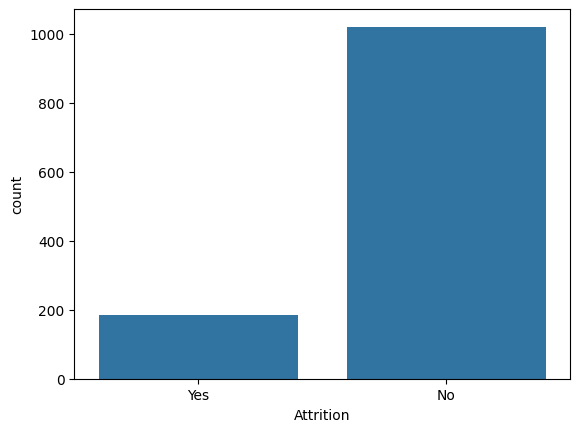

In [10]:
sns.countplot(x=df["Attrition"])

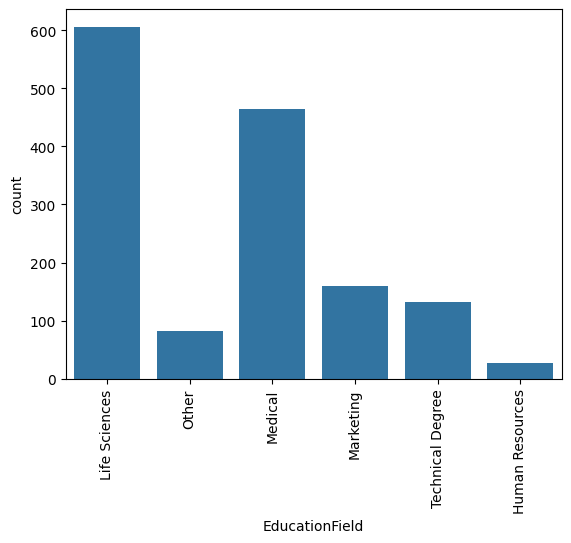

In [11]:
sns.countplot(x=df['EducationField'])
plt.xticks(rotation=90);

### Veri Temizleme

<div class="alert alert-block alert-info">
Veri temizleme işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/04-Cleaning-Data/Cleaning-Data.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [12]:
# Attrition alanında 265 adet boş veri var. Veri seti yeterince büyük olduğu için bunları doldurmak yerine boş alanı olan kayıtları temizleyelim.

df = df.dropna()
df.shape

(1205, 35)

### Özellik Mühendisliği

<div class="alert alert-block alert-info">
Özellik mühendisliği işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/05-Feature-Engineering/Feature-Engineering.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [13]:
# Özellik seçimi için hedef alan hariç tüm alanları girdi olarka belirleyelim
x=df.drop("Attrition", axis=1) # axis değerinde 0: satırlar, 1: sütunlar için kullanılır.

# Hedef alanını belirleyelim
y=df[["Attrition"]]

# Girdi ve çıktı verilerinin boyutlarına bakalım
x.shape, y.shape

((1205, 34), (1205, 1))

In [14]:
# Burada metin içeren kategorik veriler için one-hot encoding uygulayalım.
x=pd.get_dummies(x, drop_first=True)

# Yeni girdi verilerinin boyutuna bakalım
x.shape

(1205, 46)

## Model Geliştirme

### Train-Test Split

Veri setini eğitim (train) ve test olmak üzere ikiye ayırıyoruz. Eğitim verileri ile geliştirilen model daha sonra test verileri ile kontrol edilerek başarısı denenir. <br>

<img src="../01-Regression/train-test-split.jpg"><br>

<div class="alert alert-block alert-success">
Resmin alındığı <a href="https://builtin.com/data-science/train-test-split">bu sayfadan</a> detaylı bilgi alınabilir.
</div>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)

Orjinal veri seti önce aşağıdaki bölümlere ayrıldı:
- x: Modelin girdi alanları
- y: Modelin hedef (tahmin edilecek) alanı

Bölünme işleminden sonra aşağıdaki bölümler oluştu:
- x_train: Eğitim için ayrılan girdi alanları
- x_test: Test için ayrılan girdi alanları
- y_train: Eğitim için ayrılan hedef alan
- y_test: Test için ayrılan hedef alan

test_size: Bu parametre bölünme aşamasında test için ayrılan oranı belirler
random_state: Bu parametr, train-test split işlemi sırasında verinin rastgele bölünmesinin tekrarlanabilir olmasını sağlar. Aynı random_state değeri kullanıldığında, her çalışmada aynı veri bölünmesi elde edilir, bu da model sonuçlarının tutarlı ve karşılaştırılabilir olmasına yardımcı olur.


In [17]:
x.shape, y.shape

((1205, 46), (1205, 1))

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((964, 46), (241, 46), (964, 1), (241, 1))

> Orjinal veri seti 1205 satırdan ve 47 (46+1) sütundan oluşuyorken, bölünmeden sonra eğitim verisi 964 satır (yaklaşık %80), test verisi de 241 satır (yaklaşık %20) veri içermektedir.

### Confusion Matrix (Karmaşıklık Matrisi)

**Confusion Matrix** (Karmaşıklık Matrisi), sınıflandırma modellerinin performansını ayrıntılı olarak gösteren bir tablodur. Bu tablo, modelin doğru ve yanlış tahminlerinin dağılımını her sınıf için ayrı ayrı görmemizi sağlar. Confusion matrix, özellikle ikili sınıflandırma problemlerinde kullanışlı olsa da, çok sınıflı problemler için de uygulanabilir. Confusion matrix, modelin sınıflandırma performansını analiz etmede ve iyileştirmede oldukça faydalı bir araçtır. Hem pozitif hem de negatif sınıfları doğru şekilde ayırt edebilmek için kullanılır.

**Confusion Matrix Yapısı**

Confusion matrix, modelin tahmin ettiği sonuçlarla gerçek sonuçları dört ana kategoriye ayırır:

|                 | Pozitif (Gerçek) | Negatif (Gerçek) |
|-----------------|------------------|-------------------|
| **Pozitif (Tahmin)** | True Positive (TP) | False Positive (FP) |
| **Negatif (Tahmin)** | False Negative (FN) | True Negative (TN) |

Bu kategoriler şunları ifade eder:

- **True Positive (TP)**: Modelin pozitif olarak sınıflandırdığı ve gerçekte de pozitif olan örneklerdir.
- **False Positive (FP)**: Modelin pozitif olarak sınıflandırdığı ancak gerçekte negatif olan örneklerdir. Buna **Type I Error** (Tip I Hata) da denir.
- **False Negative (FN)**: Modelin negatif olarak sınıflandırdığı ancak gerçekte pozitif olan örneklerdir. Buna **Type II Error** (Tip II Hata) da denir.
- **True Negative (TN)**: Modelin negatif olarak sınıflandırdığı ve gerçekte de negatif olan örneklerdir.

Bu dört kategori, modelin ne kadar doğru sınıflandırma yaptığını ve hangi tür hataları daha çok yaptığını anlamamıza yardımcı olur.

### Sınıflandırma Modellerinde Kullanılan Başarı Metrikleri

Makine öğrenmesi sınıflandırma modellerinde model performansını değerlendirmek için çeşitli başarı metrikleri kullanılır. Bu metrikler, modelin doğruluğunu, yanlış sınıflandırma oranını ve genel performansını analiz etmede faydalıdır. İşte bu metriklerden başlıcaları:

#### 1. Accuracy (Doğruluk)
**Accuracy**, modelin doğru sınıflandırdığı örneklerin, toplam örneklere oranını ifade eder. İkili sınıflandırma probleminde `True Positive (TP)`, `True Negative (TN)`, `False Positive (FP)` ve `False Negative (FN)` üzerinden hesaplanır. Formülü:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Bu metrik, sınıflar arasında dengesizlik olmadığında genellikle iyi bir performans ölçütüdür. Ancak dengesiz veri kümelerinde yanıltıcı olabilir.

#### 2. Precision (Kesinlik)
**Precision**, modelin pozitif olarak sınıflandırdığı örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Özellikle, yanlış pozitiflerin minimize edilmesi gereken durumlarda kullanışlıdır. Formülü:
$$
Precision = \frac{TP}{TP + FP}
$$
Yüksek **precision** değeri, modelin pozitif sınıfı doğru sınıflandırmada başarılı olduğunu ifade eder.

#### 3. Recall (Duyarlılık) veya Sensitivity
**Recall**, modelin pozitif olan örnekleri ne kadar doğru tespit ettiğini gösterir. Formülü:
$$
Recall = \frac{TP}{TP + FN}
$$
Özellikle, pozitif örnekleri kaçırmamak önemli olduğunda, örneğin hastalık tespiti gibi durumlarda tercih edilen bir metriktir.

#### 4. F1-Score
**F1-Score**, precision ve recall arasında bir denge kurarak her ikisini birlikte değerlendirir. Harmonik ortalama kullanılarak hesaplanır ve şu formülle ifade edilir:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
**F1-Score** özellikle dengesiz veri kümelerinde ve her iki hatanın (FP ve FN) minimize edilmesi gerektiğinde kullanışlıdır.

In [19]:
# Başarı metrikleri için gereken paketleri import edelim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### GaussianNB

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
# Yeni bir GaussianNB nesnesi tanımlayalım
g=GaussianNB()

In [22]:
# Modeli eğitelim
g.fit(x_train, y_train)

GaussianNB()

In [23]:
# Test verilerini tahmin edelim
tahmin = g.predict(x_test)

In [24]:
# Accuracy Score değerini hesaplayalım
accuracy_score(y_test, tahmin) 

0.7883817427385892

> Modelin %78,8 oranında başarılı olduğu görülüyor. Peki bu başarıyı elde ederken hangi tür verilerde doğru / yanlış tahminde bulundu?

In [25]:
# Doğru / yanlış tahmin sayılarını hesaplayalım
confusion_matrix(y_test, tahmin)

array([[171,  40],
       [ 11,  19]])

<Axes: >

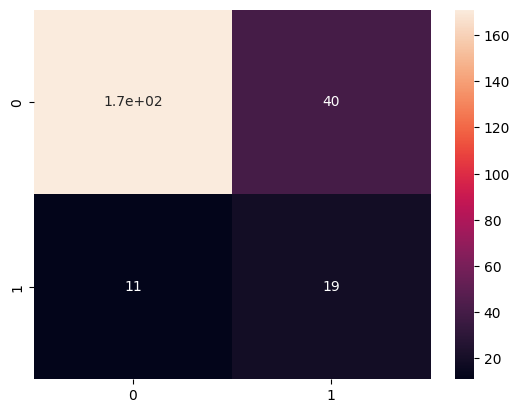

In [26]:
# Sonucu grafik ile gösterelim
sns.heatmap(confusion_matrix(y_test, tahmin), annot=True)

In [27]:
# Genel duruma bakalım
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.94      0.81      0.87       211
         Yes       0.32      0.63      0.43        30

    accuracy                           0.79       241
   macro avg       0.63      0.72      0.65       241
weighted avg       0.86      0.79      0.82       241



### BernoulliNB

In [28]:
from sklearn.naive_bayes import BernoulliNB

In [29]:
b = BernoulliNB()
b.fit(x_train, y_train)
tahmin = b.predict(x_test)

accuracy_score(y_test, tahmin)

0.8257261410788381

In [30]:
confusion_matrix(y_test, tahmin)

array([[192,  19],
       [ 23,   7]])

<Axes: >

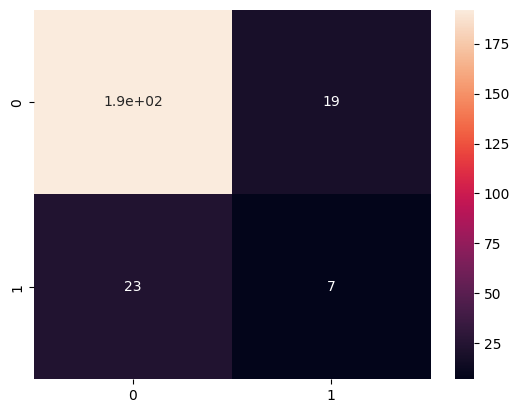

In [31]:
sns.heatmap(confusion_matrix(y_test, tahmin), annot=True)

In [32]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90       211
         Yes       0.27      0.23      0.25        30

    accuracy                           0.83       241
   macro avg       0.58      0.57      0.58       241
weighted avg       0.82      0.83      0.82       241



### LogisticRegression

Bu model her ne kadar Regresyon modeli gibi görünse de aslında sınıflandırma için de kullanılabilmektedir.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
tahmin = lg.predict(x_test)

accuracy_score(y_test, tahmin)

0.8672199170124482

In [35]:
confusion_matrix(y_test, tahmin)

array([[209,   2],
       [ 30,   0]])

<Axes: >

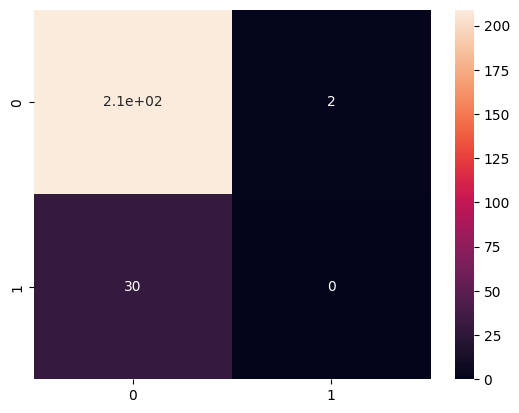

In [36]:
sns.heatmap(confusion_matrix(y_test, tahmin), annot=True)

In [37]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       211
         Yes       0.00      0.00      0.00        30

    accuracy                           0.87       241
   macro avg       0.44      0.50      0.46       241
weighted avg       0.77      0.87      0.81       241



<div class="alert alert-block alert-success">
<b>Yorum:</b> Toplam sayı içinde tahmin başarısı bu modelde daha yüksek çıktı (accuracy: %87). Ancak sınıf bazında orana bakılınca  Yes sınıfı için hiç doğru tahmin üretmediği (%0) görülüyor. Aslında model 2'si hariç diğer tüm kayıtların No sınıfında olduğunu tahmin etmiş. Bu da genel başarı oranını yüksek çıkarmasına rağmen sınıf bazında hatalı tahmin etme durumu ile sonuçlanmaktadır. Bu durum da sağlıklı bir tahmin üretmek için yeterli değil. Diğer modellere bakalım.
</div>

### DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
tahmin = dt.predict(x_test)

accuracy_score(y_test, tahmin)

0.8049792531120332

In [40]:
confusion_matrix(y_test, tahmin)

array([[181,  30],
       [ 17,  13]])

<Axes: >

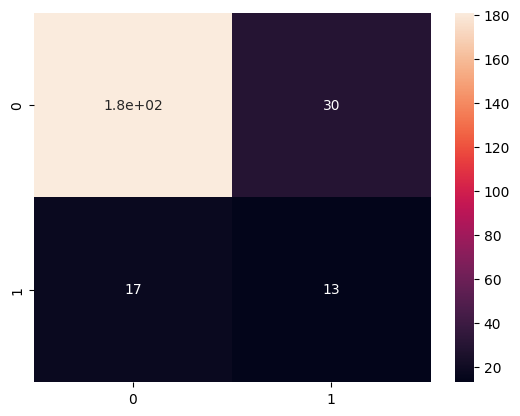

In [41]:
sns.heatmap(confusion_matrix(y_test, tahmin), annot=True)

In [42]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.91      0.86      0.89       211
         Yes       0.30      0.43      0.36        30

    accuracy                           0.80       241
   macro avg       0.61      0.65      0.62       241
weighted avg       0.84      0.80      0.82       241



<div class="alert alert-block alert-success">
<b>Yorum:</b> Toplam sayı içinde tahmin başarısı bu modelde daha yüksek çıktı (accuracy: %81). Ancak sınıf bazında orana bakılınca  Yes sınıfı için oldukça düşük tahmin ürettiği (%37) görülüyor. Bu durum da sağlıklı bir tahmin üretmek için yeterli değil. Diğer modellere bakalım.
</div>

### RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
tahmin = rf.predict(x_test)

accuracy_score(y_test, tahmin)

0.8796680497925311

In [45]:
confusion_matrix(y_test, tahmin)

array([[211,   0],
       [ 29,   1]])

<Axes: >

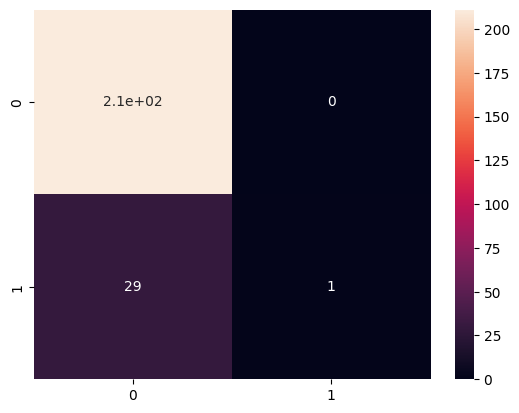

In [46]:
sns.heatmap(confusion_matrix(y_test, tahmin), annot=True)

In [47]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94       211
         Yes       1.00      0.03      0.06        30

    accuracy                           0.88       241
   macro avg       0.94      0.52      0.50       241
weighted avg       0.89      0.88      0.83       241



# Son Söz

### Model Performansları - Classification Report Özeti

| **Model**                | **Accuracy** | **Precision (No)** | **Precision (Yes)** | **Recall (No)** | **Recall (Yes)** | **F1-Score (No)** | **F1-Score (Yes)** |
|--------------------------|--------------|---------------------|---------------------|-----------------|------------------|-------------------|---------------------|
| **GaussianNB**            | 0.79         | 0.94                | 0.32                | 0.81            | 0.63             | 0.87              | 0.43                |
| **BernoulliNB**           | 0.83         | 0.89                | 0.27                | 0.91            | 0.23             | 0.90              | 0.25                |
| **LogisticRegression**    | 0.87         | 0.87                | 0.00                | 0.99            | 0.00             | 0.93              | 0.00                |
| **DecisionTreeClassifier**| 0.78         | 0.90                | 0.24                | 0.83            | 0.37             | 0.87              | 0.29                |
| **RandomForestClassifier**| 0.89         | 0.89                | 1.00                | 1.00            | 0.13             | 0.94              | 0.24                |

### Açıklama:
Modellerin genel doğruluk (accuracy) değerleri arasında **RandomForestClassifier** (%89) en yüksek başarıyı gösterirken, **LogisticRegression** (%87) da başarılıdır. Ancak, dengesiz veri nedeniyle çoğu model "Yes" sınıfında düşük performans sergilemektedir. Özellikle, **LogisticRegression** "Yes" sınıfını hiç doğru tahmin edememiştir (precision ve recall sıfır). **GaussianNB** ve **BernoulliNB**, "No" sınıfını iyi tanıyıp yüksek sonuçlar verirken, "Yes" sınıfındaki tahminlerde zayıf kalmaktadır. **RandomForestClassifier**, "No" sınıfını mükemmel tahmin etmesine rağmen, "Yes" sınıfında çok düşük recall değerlerine sahiptir. Genel olarak, modellerin çoğu "No" sınıfında iyi sonuçlar verirken, sınıf dengesizliğinden dolayı "Yes" sınıfında ciddi zayıflıklar gözlemlenmektedir.

### Öneriler:
* Sınıf dengesizliği (**Unbalanced Data**) problemine yönelik stratejiler (örneğin, SMOTE, ağırlıklı kayıp fonksiyonları) kullanılabilir. Bu konuda yakında bir uygulama örneği yapılacak ve buraya linki koyulacaktır.
* RandomForest ve LogisticRegression gibi modellerin daha dengeli tahminler yapabilmesi için sınıf ağırlıkları üzerinde oynama yapılabilir.
